## Understanding the difference in biomass between high and low NO$_3$ years. 
`Background`: In Notebook `Quartery_biomass_interannual_62_yr.ipynb` I show that the difference in biomass in the summer between high and low NO$_3$ years favors biomass in low NO$_3$ years. 

    - I made sure I plotted this correctly, so now I need to understand why this difference is ocurring 
`Hypothesis`: Under lower NO$_3$ concentrations, small phytoplankton are still not limited, but larger phytoplankton are, so the higher biomass comes from increased small phytoplankton biomass. Where there are higher NO$_3$ concentrations, there would be lower biomass coming from a higher contribution of larger phytoplankton, but lower general phytoplankton biomass?

    - To prove this, I need to understand the general limitation for different phytoplankton groups in low vs high nutrient environemnts. 

    - And also the general contribution of phytoplankton in low vs high nutrient environments

In [2]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib
# Scientific libraries
from numpy import arange,array,ones
from scipy import stats
import os

In [3]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

### Import interannual dataset [All 63 years of the 2$^{nd}$ cycle]
____ 

In [ ]:
path = '/glade/u/home/gabyn/scratch/archive/g.e21.G1850ECOIAF.t62_g17.marbl0_33.GNG595/ocn/hist'
case = 'SPECTRA_0'

In [3]:
newNCDFfiles1 = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/SPECTRA_*.nc', recursive=True),
                      key=numericalSort)

ds = xr.open_mfdataset(newNCDFfiles1,combine='by_coords')

#### Picoplankton nutrient limitation 

In [4]:
pp_lims=np.stack([ds.pp_P_lim_Cweight_avg_100m,
                  ds.pp_Fe_lim_Cweight_avg_100m,
                  ds.pp_N_lim_Cweight_avg_100m],axis=3)

pp_lims_value=np.zeros(shape=ds.pp_light_lim_Cweight_avg_100m.shape)
pp_lims_index=np.zeros(shape=ds.pp_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=pp_lims[i,:,:,:]
        pp_lims_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        pp_lims_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['pp_lims_value']=xr.DataArray(data=pp_lims_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'Picoplankton maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['pp_lims_index']=xr.DataArray(data=pp_lims_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'Picoplankton maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-P, 3-Fe, 4-N'})

#### Mixed phytoplankton nutrient limtiation 

In [5]:
mp1_lims=np.stack([ds.mp1_P_lim_Cweight_avg_100m,
                   ds.mp1_Fe_lim_Cweight_avg_100m,
                   ds.mp1_N_lim_Cweight_avg_100m],axis=3)

mp1_lims_value=np.zeros(shape=ds.mp1_light_lim_Cweight_avg_100m.shape)
mp1_lims_index=np.zeros(shape=ds.mp1_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=mp1_lims[i,:,:,:]
        mp1_lims_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        mp1_lims_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['mp1_lims_value']=xr.DataArray(data=mp1_lims_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp1 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['mp1_lims_index']=xr.DataArray(data=mp1_lims_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp1 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-P, 3-Fe, 4-N'})

mp2_lims=np.stack([ds.mp2_P_lim_Cweight_avg_100m,
                   ds.mp2_Fe_lim_Cweight_avg_100m,
                   ds.mp2_N_lim_Cweight_avg_100m],axis=3)

mp2_lims_value=np.zeros(shape=ds.mp2_light_lim_Cweight_avg_100m.shape)
mp2_lims_index=np.zeros(shape=ds.mp2_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=mp2_lims[i,:,:,:]
        mp2_lims_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        mp2_lims_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['mp2_lims_value']=xr.DataArray(data=mp2_lims_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp2 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['mp2_lims_index']=xr.DataArray(data=mp2_lims_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp2 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-P, 3-Fe, 4-N'})


mp3_lims=np.stack([ds.mp3_P_lim_Cweight_avg_100m,
                   ds.mp3_Fe_lim_Cweight_avg_100m,
                   ds.mp3_N_lim_Cweight_avg_100m],axis=3)

mp3_lims_value=np.zeros(shape=ds.mp3_light_lim_Cweight_avg_100m.shape)
mp3_lims_index=np.zeros(shape=ds.mp3_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=mp3_lims[i,:,:,:]
        mp3_lims_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        mp3_lims_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['mp3_lims_value']=xr.DataArray(data=mp3_lims_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp3 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['mp3_lims_index']=xr.DataArray(data=mp3_lims_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp3 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-P, 3-Fe, 4-N'})


mp4_lims=np.stack([ds.mp4_P_lim_Cweight_avg_100m,
                   ds.mp4_Fe_lim_Cweight_avg_100m,
                   ds.mp4_N_lim_Cweight_avg_100m],axis=3)

mp4_lims_value=np.zeros(shape=ds.mp4_light_lim_Cweight_avg_100m.shape)
mp4_lims_index=np.zeros(shape=ds.mp4_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=mp4_lims[i,:,:,:]
        mp4_lims_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        mp4_lims_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['mp4_lims_value']=xr.DataArray(data=mp4_lims_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp4 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['mp4_lims_index']=xr.DataArray(data=mp4_lims_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp4 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-P, 3-Fe, 4-N'})

#### Diatom nutrient limtiation 

In [6]:
diat1_lims=np.stack([ds.diat1_P_lim_Cweight_avg_100m,
                   ds.diat1_Fe_lim_Cweight_avg_100m,
                   ds.diat1_N_lim_Cweight_avg_100m,
                   ds.diat1_SiO3_lim_Cweight_avg_100m],axis=3)

diat1_lims_value=np.zeros(shape=ds.diat1_light_lim_Cweight_avg_100m.shape)
diat1_lims_index=np.zeros(shape=ds.diat1_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=diat1_lims[i,:,:,:]
        diat1_lims_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        diat1_lims_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['diat1_lims_value']=xr.DataArray(data=diat1_lims_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 1 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['diat1_lims_index']=xr.DataArray(data=diat1_lims_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 1 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-P, 3-Fe, 4-N, 5-Si'})

diat2_lims=np.stack([ds.diat2_P_lim_Cweight_avg_100m,
                   ds.diat2_Fe_lim_Cweight_avg_100m,
                   ds.diat2_N_lim_Cweight_avg_100m,
                   ds.diat2_SiO3_lim_Cweight_avg_100m],axis=3)

diat2_lims_value=np.zeros(shape=ds.diat2_light_lim_Cweight_avg_100m.shape)
diat2_lims_index=np.zeros(shape=ds.diat2_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=diat2_lims[i,:,:,:]
        diat2_lims_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        diat2_lims_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['diat2_lims_value']=xr.DataArray(data=diat2_lims_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 1 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['diat2_lims_index']=xr.DataArray(data=diat2_lims_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 1 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-P, 3-Fe, 4-N, 5-Si'})

diat3_lims=np.stack([ds.diat3_P_lim_Cweight_avg_100m,
                   ds.diat3_Fe_lim_Cweight_avg_100m,
                   ds.diat3_N_lim_Cweight_avg_100m,
                   ds.diat3_SiO3_lim_Cweight_avg_100m],axis=3)

diat3_lims_value=np.zeros(shape=ds.diat3_light_lim_Cweight_avg_100m.shape)
diat3_lims_index=np.zeros(shape=ds.diat3_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=diat3_lims[i,:,:,:]
        diat3_lims_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        diat3_lims_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['diat3_lims_value']=xr.DataArray(data=diat3_lims_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 3 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['diat3_lims_index']=xr.DataArray(data=diat3_lims_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 3 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-P, 3-Fe, 4-N, 5-Si'})

### Now find the most limiting factor using the light and temperature values
____

### Calcualte the temperature limiation term! 
$$r = r_o e^{\frac{-E_a(T_o -T)}{k T_o T}}$$
$$\frac{\mu}{\mu_o} = e^{\frac{-E_a(T_o -T)}{k T_o T}}$$ 

to simplify however, we will create $\alpha = \frac{E_a}{k}$ and $\gamma_T = 
\frac{\mu}{\mu_o}$ so that: 
$$\gamma_T = e^{ \frac{-\alpha(T_o - T)}{T_o T}}$$

$T_o = 298.15 ^oK$
* it is close to the temperature at which many physiological experiments are run, and it is the mean temperature of the subtropical gyres, which represent a large proportion of the world’s open oceans.

$k = 8.617e^{-5} eVK^{-1}$ 

$E_a = 0.317$ phytoplankton (Kremer et al., 2017).

$E_a = 0.42$ picoplankton 
* Multiple studies have shown that picoplankton have a higher temperature sensitivity compared to phytoplankton of larger sizes (Chen et al., 2014; Stawiarski et al., 2016).

$E_a = 0.65$ zooplankton 
* MTE predicts that heterotrophic organisms will have a greater temperature dependence than autotrophs, as Rubisco carboxylation (rate limiting for photosynthesis) has a lower activation energy (Ea) than ATP synthesis (Allen et al., 2005; Lopez-Urrutia et al., 2006).

and we will have to convert all the surface temperatures from $^oC$ to $K$ and the temperature on the equation and then solve for every gorup... 
$$0°C + 273.15 = 273.15K$$

In [7]:
# convert celcius to kelvin 
temp_K = ds.TEMP + 273.15

# constants 
𝑘=8.617e-5
𝐸𝑎_phyto = 0.317 
𝐸𝑎_pico  = 0.42
𝐸𝑎_zoo   = 0.65
𝑇𝑜 = 298.15

# create simpler variables. 
𝛼_phyto = 𝐸𝑎_phyto/𝑘
𝛼_pico = 𝐸𝑎_pico/𝑘
𝛼_zoo = 𝐸𝑎_zoo/𝑘

# calculate temperature limitation term
𝛾𝑇_phyto = np.exp((-𝛼_phyto*(𝑇𝑜-temp_K))/(𝑇𝑜*temp_K))
𝛾𝑇_pico = np.exp((-𝛼_pico*(𝑇𝑜-temp_K))/(𝑇𝑜*temp_K))
𝛾𝑇_zoo = np.exp((-𝛼_zoo*(𝑇𝑜-temp_K))/(𝑇𝑜*temp_K))

In [8]:
diat1_lim = np.stack([ds.diat1_light_lim_surf, 
                       𝛾𝑇_phyto[:,0,:,:], ds.diat1_lims_value],axis=3)

diat2_lim = np.stack([ds.diat2_light_lim_surf, 
                       𝛾𝑇_phyto[:,0,:,:], ds.diat2_lims_value],axis=3)

diat3_lim = np.stack([ds.diat3_light_lim_surf, 
                       𝛾𝑇_phyto[:,0,:,:], ds.diat3_lims_value],axis=3)

mp1_lim = np.stack([ds.mp1_light_lim_surf, 
                     𝛾𝑇_phyto[:,0,:,:], ds.mp1_lims_value],axis=3)

mp2_lim = np.stack([ds.mp2_light_lim_surf, 
                     𝛾𝑇_phyto[:,0,:,:], ds.mp2_lims_value],axis=3)

mp3_lim = np.stack([ds.mp3_light_lim_surf, 
                     𝛾𝑇_phyto[:,0,:,:], ds.mp3_lims_value],axis=3)

mp4_lim = np.stack([ds.mp4_light_lim_surf, 
                     𝛾𝑇_phyto[:,0,:,:], ds.mp4_lims_value],axis=3)

pp_lim = np.stack([ds.pp_light_lim_surf, 
                    𝛾𝑇_pico[:,0,:,:], ds.pp_lims_value],axis=3)

In [9]:
pp_lim = np.stack([ds.pp_light_lim_surf, 
                    𝛾𝑇_pico[:,0,:,:], ds.pp_lims_value],axis=3)

#### Diatom Growth Limitation 

In [10]:
diat1_lim_value=np.zeros(shape=ds.diat1_light_lim_Cweight_avg_100m.shape)
diat1_lim_index=np.zeros(shape=ds.diat1_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=diat1_lim[i,:,:,:]
        diat1_lim_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        diat1_lim_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['diat1_lim_value']=xr.DataArray(data=diat1_lim_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 1 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['diat1_lim_index']=xr.DataArray(data=diat1_lim_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 1 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-Nutrient'})


diat2_lim_value=np.zeros(shape=ds.diat2_light_lim_Cweight_avg_100m.shape)
diat2_lim_index=np.zeros(shape=ds.diat2_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=diat2_lim[i,:,:,:]
        diat2_lim_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        diat2_lim_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['diat2_lim_value']=xr.DataArray(data=diat2_lim_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 1 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['diat2_lim_index']=xr.DataArray(data=diat2_lim_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 1 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-Nutrient'})


diat3_lim_value=np.zeros(shape=ds.diat3_light_lim_Cweight_avg_100m.shape)
diat3_lim_index=np.zeros(shape=ds.diat3_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=diat3_lim[i,:,:,:]
        diat3_lim_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        diat3_lim_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['diat3_lim_value']=xr.DataArray(data=diat3_lim_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 3 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['diat3_lim_index']=xr.DataArray(data=diat3_lim_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'diatom 3 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-Nutrient'})
                                        
                                    

#### Mixed phytoplankton growth limitation 

In [11]:
mp1_lim_value=np.zeros(shape=ds.mp1_light_lim_Cweight_avg_100m.shape)
mp1_lim_index=np.zeros(shape=ds.mp1_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=mp1_lim[i,:,:,:]
        mp1_lim_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        mp1_lim_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['mp1_lim_value']=xr.DataArray(data=mp1_lim_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp1 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['mp1_lim_index']=xr.DataArray(data=mp1_lim_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp1 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-Nutrient'})


mp2_lim_value=np.zeros(shape=ds.mp2_light_lim_Cweight_avg_100m.shape)
mp2_lim_index=np.zeros(shape=ds.mp2_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=mp2_lim[i,:,:,:]
        mp2_lim_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        mp2_lim_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['mp2_lim_value']=xr.DataArray(data=mp2_lim_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp2 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['mp2_lim_index']=xr.DataArray(data=mp2_lim_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp2 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-Nutrient'})



mp3_lim_value=np.zeros(shape=ds.mp3_light_lim_Cweight_avg_100m.shape)
mp3_lim_index=np.zeros(shape=ds.mp3_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=mp3_lim[i,:,:,:]
        mp3_lim_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        mp3_lim_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['mp3_lim_value']=xr.DataArray(data=mp3_lim_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp3 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['mp3_lim_index']=xr.DataArray(data=mp3_lim_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp3 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-Nutrient'})


mp4_lim_value=np.zeros(shape=ds.mp4_light_lim_Cweight_avg_100m.shape)
mp4_lim_index=np.zeros(shape=ds.mp4_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=mp4_lim[i,:,:,:]
        mp4_lim_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        mp4_lim_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['mp4_lim_value']=xr.DataArray(data=mp4_lim_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp4 maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['mp4_lim_index']=xr.DataArray(data=mp4_lim_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mp4 maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-nutrient'})

#### Picoplankton growth limitation 

In [12]:
pp_lim_value=np.zeros(shape=ds.pp_light_lim_Cweight_avg_100m.shape)
pp_lim_index=np.zeros(shape=ds.pp_light_lim_Cweight_avg_100m.shape)

for i,t in enumerate(ds.time.values):
        temp=pp_lim[i,:,:,:]
        pp_lim_value[i,:,:]=deepcopy(np.amin(temp,axis=2))
        pp_lim_index[i,:,:]=deepcopy(np.argmin(temp,axis=2))
        
ds['pp_lim_value']=xr.DataArray(data=pp_lim_value, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'Picoplankton maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['pp_lim_index']=xr.DataArray(data=pp_lim_index, coords={'time':ds.time.values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'Picoplankton maximum limitation type, carbon biomass weighted average over 0-100m',
                                        'values':'0-light,1-temp, 2-Nutrient'})

#### Now reshape these files, so that they have month, year, lat and lon as the dimensions 
____

`picoplankton`

In [13]:
pp_lim_ds_val = np.empty([63,12,384,320]) ; pp_lim_ds_val[:] = np.nan
pp_lim_ds_index = np.empty([63,12,384,320]) ; pp_lim_ds_index[:] = np.nan

x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    pp_lim_ds_val[i,:,:,:] = ds['pp_lim_value'][x[i]:x[i]+12,:,:]
    pp_lim_ds_index[i,:,:,:] = ds['pp_lim_index'][x[i]:x[i]+12,:,:]

In [14]:
pp_lim_ds_index.shape

(63, 12, 384, 320)

`mixed phytoplankton`

In [15]:
# Mixed phytoplankton 1 
mp1_lim_ds_val = np.empty([63,12,384,320]) ; mp1_lim_ds_val[:] = np.nan
mp1_lim_ds_index = np.empty([63,12,384,320]) ; mp1_lim_ds_index[:] = np.nan

x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    mp1_lim_ds_val[i,:,:,:] = ds['mp1_lim_value'][x[i]:x[i]+12,:,:]
    mp1_lim_ds_index[i,:,:,:] = ds['mp1_lim_index'][x[i]:x[i]+12,:,:]
    
# Mixed phytoplankton 2     
mp2_lim_ds_val = np.empty([63,12,384,320]) ; mp2_lim_ds_val[:] = np.nan
mp2_lim_ds_index = np.empty([63,12,384,320]) ; mp2_lim_ds_index[:] = np.nan

x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    mp2_lim_ds_val[i,:,:,:] = ds['mp2_lim_value'][x[i]:x[i]+12,:,:]
    mp2_lim_ds_index[i,:,:,:] = ds['mp2_lim_index'][x[i]:x[i]+12,:,:] 

# Mixed phytoplankton 3     
mp3_lim_ds_val = np.empty([63,12,384,320]) ; mp3_lim_ds_val[:] = np.nan
mp3_lim_ds_index = np.empty([63,12,384,320]) ; mp3_lim_ds_index[:] = np.nan

x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    mp3_lim_ds_val[i,:,:,:] = ds['mp3_lim_value'][x[i]:x[i]+12,:,:]
    mp3_lim_ds_index[i,:,:,:] = ds['mp3_lim_index'][x[i]:x[i]+12,:,:]
    
# Mixed phytoplankton 4    
mp4_lim_ds_val = np.empty([63,12,384,320]) ; mp4_lim_ds_val[:] = np.nan
mp4_lim_ds_index = np.empty([63,12,384,320]) ; mp4_lim_ds_index[:] = np.nan

x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    mp4_lim_ds_val[i,:,:,:] = ds['mp4_lim_value'][x[i]:x[i]+12,:,:]
    mp4_lim_ds_index[i,:,:,:] = ds['mp4_lim_index'][x[i]:x[i]+12,:,:]

`diatoms`

In [72]:
# Diatom 1    
diat1_lim_ds_val = np.empty([63,12,384,320]) ; diat1_lim_ds_val[:] = np.nan
diat1_lim_ds_index = np.empty([63,12,384,320]) ; diat1_lim_ds_index[:] = np.nan

x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    diat1_lim_ds_val[i,:,:,:] = ds['diat1_lim_value'][x[i]:x[i]+12,:,:]
    diat1_lim_ds_index[i,:,:,:] = ds['diat1_lim_index'][x[i]:x[i]+12,:,:]
    
# Diatom 2    
diat2_lim_ds_val = np.empty([63,12,384,320]) ; diat2_lim_ds_val[:] = np.nan
diat2_lim_ds_index = np.empty([63,12,384,320]) ; diat2_lim_ds_index[:] = np.nan

x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    diat2_lim_ds_val[i,:,:,:] = ds['diat2_lim_value'][x[i]:x[i]+12,:,:]
    diat2_lim_ds_index[i,:,:,:] = ds['diat2_lim_index'][x[i]:x[i]+12,:,:]
    
# Diatom 3    
diat3_lim_ds_val = np.empty([63,12,384,320]) ; diat3_lim_ds_val[:] = np.nan
diat3_lim_ds_index = np.empty([63,12,384,320]) ; diat3_lim_ds_index[:] = np.nan

x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    diat3_lim_ds_val[i,:,:,:] = ds['diat3_lim_value'][x[i]:x[i]+12,:,:]
    diat3_lim_ds_index[i,:,:,:] = ds['diat3_lim_index'][x[i]:x[i]+12,:,:]

### High vs Low NO$_3$ concentrations
____

In [17]:
NO3_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_NO3*.nc', recursive=True))
ds_03= xr.open_mfdataset(NO3_inds,concat_dim='time', combine='nested')

In [18]:
NO3_ds_inter = np.empty([63,12,180,360])
NO3_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    NO3_ds_inter[i,:,:,:] = ds_03.NO3[x[i]:x[i]+12,0,:,:]

In [19]:
no3_arctic = np.nanmean(NO3_ds_inter[:,:,149:180,:], axis=(2,3))
no3_arctic_anom = no3_arctic-np.nanmean(no3_arctic,axis=0)
err_ao = np.nanstd(no3_arctic_anom,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
low_no3_years_arctic = np.where(np.nanmean(no3_arctic_anom,axis=1) < -(err_ao/2))
high_no3_years_arctic = np.where(np.nanmean(no3_arctic_anom,axis=1) > (err_ao/2))

In [20]:
pp_lim_ds_val.shape

(63, 12, 384, 320)

In [21]:
# Picoplankton 
low_no3_pp_ind = pp_lim_ds_index[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_pp_ind = pp_lim_ds_index[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 
low_no3_pp_val = pp_lim_ds_val[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_pp_val = pp_lim_ds_val[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

In [22]:
# Mixed Phytoplankton 
low_no3_mp1_ind = mp1_lim_ds_index[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_mp1_ind = mp1_lim_ds_index[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 
low_no3_mp1_val = mp1_lim_ds_val[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_mp1_val = mp1_lim_ds_val[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

low_no3_mp2_ind = mp2_lim_ds_index[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_mp2_ind = mp2_lim_ds_index[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 
low_no3_mp2_val = mp2_lim_ds_val[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_mp2_val = mp2_lim_ds_val[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

low_no3_mp3_ind = mp3_lim_ds_index[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_mp3_ind = mp3_lim_ds_index[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 
low_no3_mp3_val = mp3_lim_ds_val[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_mp3_val = mp3_lim_ds_val[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

low_no3_mp4_ind = mp4_lim_ds_index[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_mp4_ind = mp4_lim_ds_index[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 
low_no3_mp4_val = mp4_lim_ds_val[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_mp4_val = mp4_lim_ds_val[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

In [73]:
# Diatoms
low_no3_diat1_ind = diat1_lim_ds_index[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_diat1_ind = diat1_lim_ds_index[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 
low_no3_diat1_val = diat1_lim_ds_val[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_diat1_val = diat1_lim_ds_val[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

low_no3_diat2_ind = diat2_lim_ds_index[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_diat2_ind = diat2_lim_ds_index[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 
low_no3_diat2_val = diat2_lim_ds_val[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_diat2_val = diat2_lim_ds_val[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

low_no3_diat3_ind = diat3_lim_ds_index[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_diat3_ind = diat3_lim_ds_index[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 
low_no3_diat3_val = diat3_lim_ds_val[low_no3_years_arctic,:,:,:] # 1/2 standard deviation 
high_no3_diat3_val = diat3_lim_ds_val[high_no3_years_arctic,:,:,:] # 1/2 standard deviation 

## Create limitaiton term plots for high NO$_3$ Years 
_____

#### Adjust pop grid

In [24]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

#### Create colorbar 

In [25]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0.9994925028835063, 0.9192618223760093, 0.6061361014994233),(0.45066769191336664, 0.7509983339741125, 0.7703857490708702),(0.6825187635707243, 0.810691907283208, 0.6352470180118206)]

cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=3)

#### Picoplankton plot of high NO$_3$ years 

In [26]:
ds['high_no3_pp_val']=xr.DataArray(data=np.nanmean(high_no3_pp_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'picoplankton  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['high_no3_pp_ind']=xr.DataArray(data=np.nanmean(high_no3_pp_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'picoplankton maximum limitation type, carbon biomass weighted average over 0-100m'})

In [27]:
pp_lims_high = (ds.high_no3_pp_val.where(ds.high_no3_pp_val < 0.9) + ds.high_no3_pp_ind.where(ds.high_no3_pp_val < 0.9))

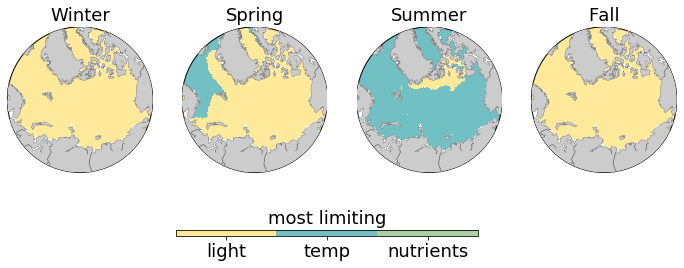

In [28]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims_high[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims_high[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims_high[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims_high[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_pp_ao_high_NO3_years.png', dpi=600, bbox_inches='tight')

In [29]:
ds['low_no3_pp_val']=xr.DataArray(data=np.nanmean(low_no3_pp_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'picoplankton  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['low_no3_pp_ind']=xr.DataArray(data=np.nanmean(low_no3_pp_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'picoplankton maximum limitation type, carbon biomass weighted average over 0-100m'})

In [30]:
pp_lims_low = (ds.low_no3_pp_val.where(ds.low_no3_pp_val < 0.9) + ds.low_no3_pp_ind.where(ds.low_no3_pp_val < 0.9))

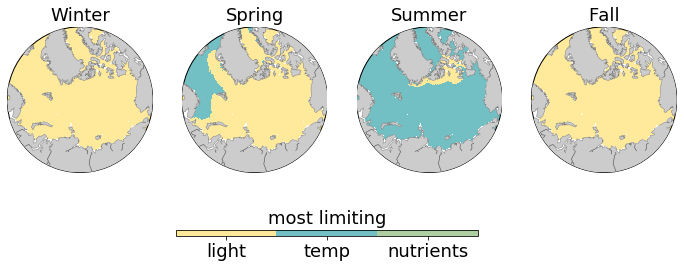

In [31]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims_low[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims_low[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims_low[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(pp_lims_low[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_pp_ao_low_NO3_years.png', dpi=600, bbox_inches='tight')

In [32]:
ds['high_no3_mp1_val']=xr.DataArray(data=np.nanmean(high_no3_mp1_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 1  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['high_no3_mp1_ind']=xr.DataArray(data=np.nanmean(high_no3_mp1_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 1 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['high_no3_mp2_val']=xr.DataArray(data=np.nanmean(high_no3_mp2_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 2  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['high_no3_mp2_ind']=xr.DataArray(data=np.nanmean(high_no3_mp2_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 2 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['high_no3_mp3_val']=xr.DataArray(data=np.nanmean(high_no3_mp3_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 3  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['high_no3_mp3_ind']=xr.DataArray(data=np.nanmean(high_no3_mp3_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 3 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['high_no3_mp4_val']=xr.DataArray(data=np.nanmean(high_no3_mp4_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 4  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['high_no3_mp4_ind']=xr.DataArray(data=np.nanmean(high_no3_mp4_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 4 maximum limitation type, carbon biomass weighted average over 0-100m'})

In [33]:
mp1_lims_high = (ds.high_no3_mp1_val.where(ds.high_no3_mp1_val < 0.9) + ds.high_no3_mp1_ind.where(ds.high_no3_mp1_val < 0.9))
mp2_lims_high = (ds.high_no3_mp2_val.where(ds.high_no3_mp2_val < 0.9) + ds.high_no3_mp2_ind.where(ds.high_no3_mp2_val < 0.9))
mp3_lims_high = (ds.high_no3_mp3_val.where(ds.high_no3_mp3_val < 0.9) + ds.high_no3_mp3_ind.where(ds.high_no3_mp3_val < 0.9))
mp4_lims_high = (ds.high_no3_mp4_val.where(ds.high_no3_mp4_val < 0.9) + ds.high_no3_mp4_ind.where(ds.high_no3_mp4_val < 0.9))

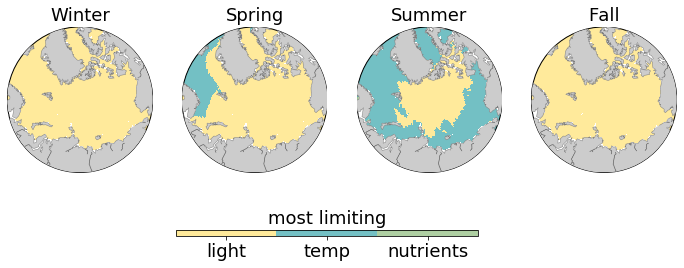

In [34]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp1_lims_high[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp1_lims_high[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp1_lims_high[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp1_lims_high[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_mp1_ao_high_NO3_years.png', dpi=600, bbox_inches='tight')

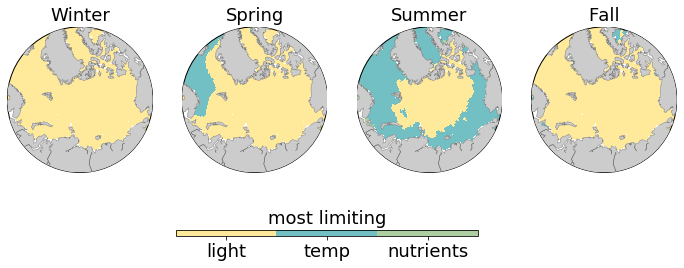

In [35]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp2_lims_high[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp2_lims_high[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp2_lims_high[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp2_lims_high[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_mp2_ao_high_NO3_years.png', dpi=600, bbox_inches='tight')

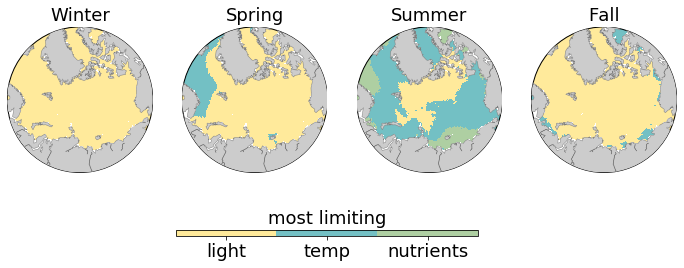

In [36]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp3_lims_high[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp3_lims_high[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp3_lims_high[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp3_lims_high[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_mp3_ao_high_NO3_years.png', dpi=600, bbox_inches='tight')

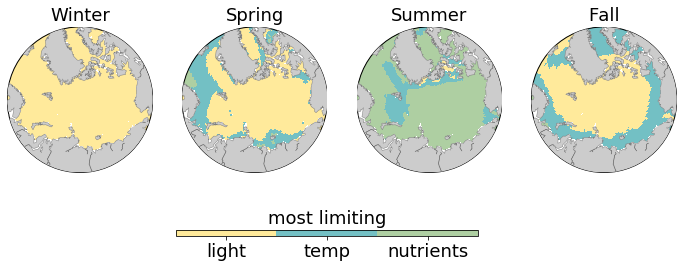

In [37]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp4_lims_high[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp4_lims_high[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp4_lims_high[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp4_lims_high[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_mp4_ao_high_NO3_years.png', dpi=600, bbox_inches='tight')

In [38]:
ds['low_no3_mp1_val']=xr.DataArray(data=np.nanmean(low_no3_mp1_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 1  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['low_no3_mp1_ind']=xr.DataArray(data=np.nanmean(low_no3_mp1_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 1 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['low_no3_mp2_val']=xr.DataArray(data=np.nanmean(low_no3_mp2_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 2  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['low_no3_mp2_ind']=xr.DataArray(data=np.nanmean(low_no3_mp2_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 2 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['low_no3_mp3_val']=xr.DataArray(data=np.nanmean(low_no3_mp3_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 3  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['low_no3_mp3_ind']=xr.DataArray(data=np.nanmean(low_no3_mp3_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 3 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['low_no3_mp4_val']=xr.DataArray(data=np.nanmean(low_no3_mp4_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 4  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['low_no3_mp4_ind']=xr.DataArray(data=np.nanmean(low_no3_mp4_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 4 maximum limitation type, carbon biomass weighted average over 0-100m'})

In [39]:
mp1_lims_low = (ds.low_no3_mp1_val.where(ds.low_no3_mp1_val < 0.9) + ds.low_no3_mp1_ind.where(ds.low_no3_mp1_val < 0.9))
mp2_lims_low = (ds.low_no3_mp2_val.where(ds.low_no3_mp2_val < 0.9) + ds.low_no3_mp2_ind.where(ds.low_no3_mp2_val < 0.9))
mp3_lims_low = (ds.low_no3_mp3_val.where(ds.low_no3_mp3_val < 0.9) + ds.low_no3_mp3_ind.where(ds.low_no3_mp3_val < 0.9))
mp4_lims_low = (ds.low_no3_mp4_val.where(ds.low_no3_mp4_val < 0.9) + ds.low_no3_mp4_ind.where(ds.low_no3_mp4_val < 0.9))

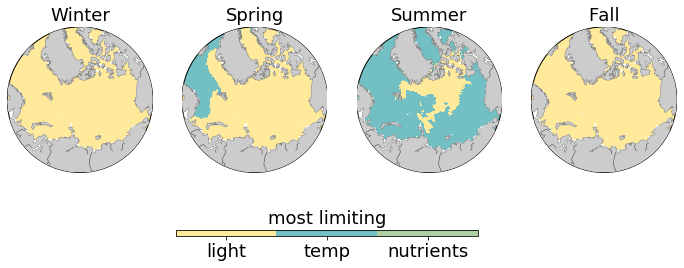

In [40]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp1_lims_low[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp1_lims_low[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp1_lims_low[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp1_lims_low[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_mp1_ao_low_NO3_years.png', dpi=600, bbox_inches='tight')

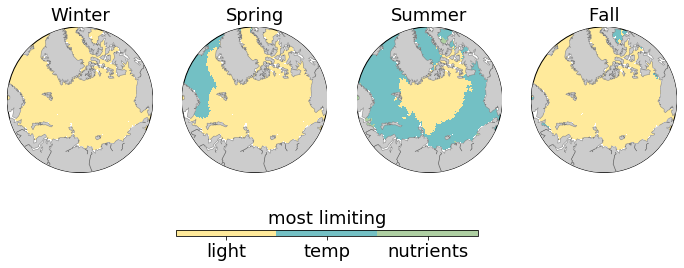

In [41]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp2_lims_low[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp2_lims_low[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp2_lims_low[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp2_lims_low[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_mp2_ao_low_NO3_years.png', dpi=600, bbox_inches='tight')

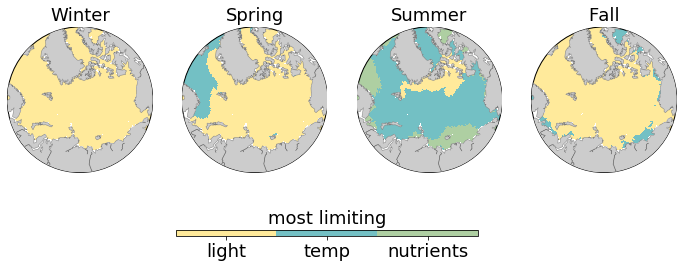

In [42]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp3_lims_low[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp3_lims_low[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp3_lims_low[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp3_lims_low[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_mp3_ao_low_NO3_years.png', dpi=600, bbox_inches='tight')

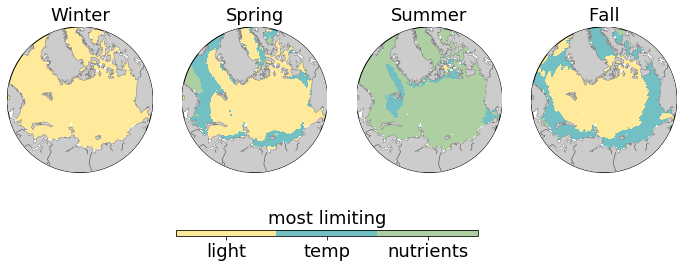

In [43]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp4_lims_low[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp4_lims_low[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp4_lims_low[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(mp4_lims_low[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_mp4_ao_low_NO3_years.png', dpi=600, bbox_inches='tight')

In [74]:
ds['low_no3_diat1_val']=xr.DataArray(data=np.nanmean(low_no3_diat1_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 1  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['low_no3_diat1_ind']=xr.DataArray(data=np.nanmean(low_no3_diat1_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 1 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['low_no3_diat2_val']=xr.DataArray(data=np.nanmean(low_no3_diat2_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                attrs={'long_name':'mixed phytoplankton 1  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['low_no3_diat2_ind']=xr.DataArray(data=np.nanmean(low_no3_diat1_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 1 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['low_no3_diat3_val']=xr.DataArray(data=np.nanmean(low_no3_diat2_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 1  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['low_no3_diat3_ind']=xr.DataArray(data=np.nanmean(low_no3_diat3_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 1 maximum limitation type, carbon biomass weighted average over 0-100m'})

In [75]:
diat1_lims_low = (ds.low_no3_diat1_val.where(ds.low_no3_diat1_val < 0.9) + ds.low_no3_diat1_ind.where(ds.low_no3_diat1_val < 0.9))
diat2_lims_low = (ds.low_no3_diat2_val.where(ds.low_no3_diat2_val < 0.9) + ds.low_no3_diat2_ind.where(ds.low_no3_diat2_val < 0.9))
diat3_lims_low = (ds.low_no3_diat3_val.where(ds.low_no3_diat3_val < 0.9) + ds.low_no3_diat3_ind.where(ds.low_no3_diat3_val < 0.9))

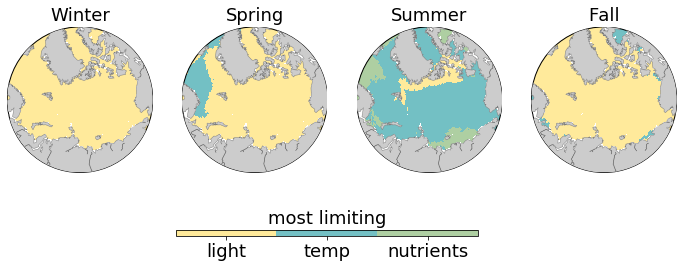

In [76]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat1_lims_low[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat1_lims_low[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat1_lims_low[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat1_lims_low[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_diat1_ao_low_NO3_years.png', dpi=600, bbox_inches='tight')

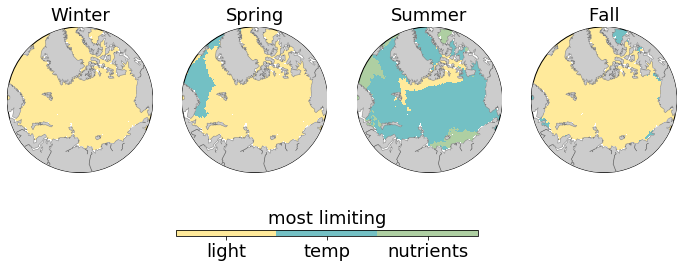

In [77]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat2_lims_low[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat2_lims_low[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat2_lims_low[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat2_lims_low[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_diat2_ao_low_NO3_years.png', dpi=600, bbox_inches='tight')

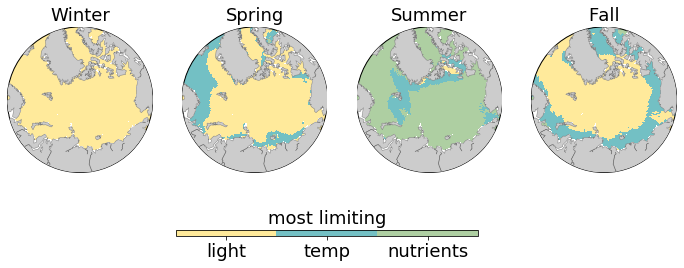

In [78]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims_low[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims_low[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims_low[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims_low[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_diat3_ao_low_NO3_years.png', dpi=600, bbox_inches='tight')

In [79]:
ds['high_no3_diat1_val']=xr.DataArray(data=np.nanmean(high_no3_diat1_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 1  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['high_no3_diat1_ind']=xr.DataArray(data=np.nanmean(high_no3_diat1_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 1 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['high_no3_diat2_val']=xr.DataArray(data=np.nanmean(high_no3_diat2_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                attrs={'long_name':'mixed phytoplankton 1  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['high_no3_diat2_ind']=xr.DataArray(data=np.nanmean(high_no3_diat1_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 1 maximum limitation type, carbon biomass weighted average over 0-100m'})

ds['high_no3_diat3_val']=xr.DataArray(data=np.nanmean(high_no3_diat2_val,axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytoplankton 1  maximum limitation value, carbon biomass weighted average over 0-100m'})
ds['high_no3_diat3_ind']=xr.DataArray(data=np.nanmean(high_no3_diat3_ind, axis=(0,1)), coords={'time':ds.time[0:12].values}, dims=['time','nlat','nlon'], 
                                 attrs={'long_name':'mixed phytopalnkton 1 maximum limitation type, carbon biomass weighted average over 0-100m'})

In [80]:
diat1_lims_high = (ds.high_no3_diat1_val.where(ds.high_no3_diat1_val < 0.9) + ds.high_no3_diat1_ind.where(ds.high_no3_diat1_val < 0.9))
diat2_lims_high = (ds.high_no3_diat2_val.where(ds.high_no3_diat2_val < 0.9) + ds.high_no3_diat2_ind.where(ds.high_no3_diat2_val < 0.9))
diat3_lims_high = (ds.high_no3_diat3_val.where(ds.high_no3_diat3_val < 0.9) + ds.high_no3_diat3_ind.where(ds.high_no3_diat3_val < 0.9))

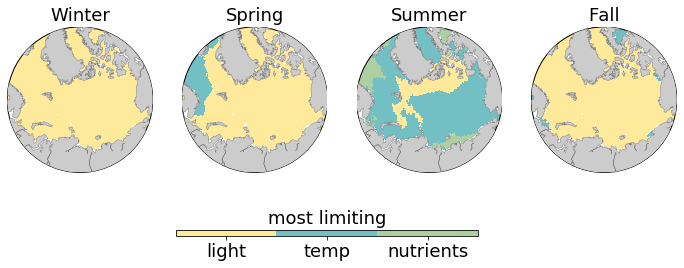

In [81]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat1_lims_high[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat1_lims_high[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat1_lims_high[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat1_lims_high[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_diat1_ao_high_NO3_years.png', dpi=600, bbox_inches='tight')

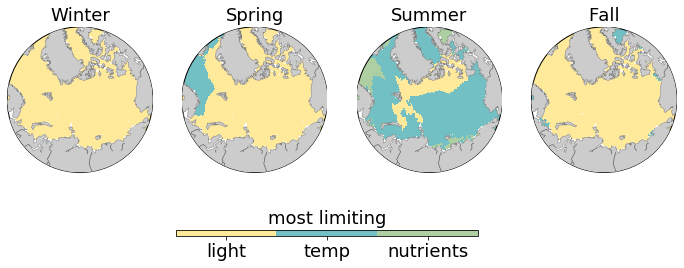

In [82]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat2_lims_high[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat2_lims_high[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat2_lims_high[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat2_lims_high[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_diat2_ao_high_NO3_years.png', dpi=600, bbox_inches='tight')

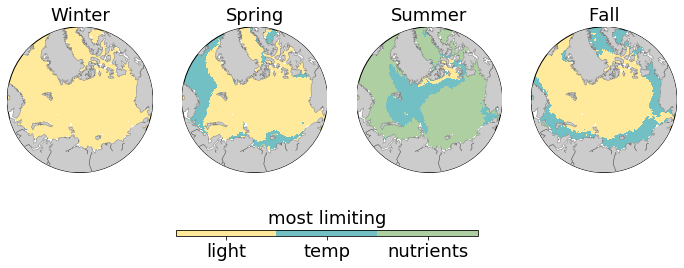

In [83]:
fig = plt.figure(figsize=(12,4))


# Winter
ax = fig.add_subplot(141) 
ax.set_title("Winter",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, winter = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims_high[list(range(2)) + [-1]], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,winter,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Spring
ax = fig.add_subplot(142) 
ax.set_title("Spring",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, spring = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims_high[2:5,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,spring,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# Summer
ax = fig.add_subplot(143) 
ax.set_title("Summer",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, summer = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims_high[5:8,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,summer,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)

# Fall
ax = fig.add_subplot(144) 
ax.set_title("Fall",fontsize=18)
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
tlon, tlat, fall = adjust_pop_grid(ds.TLONG, ds.TLAT, np.nanmean(diat3_lims_high[8:11,:,:], axis=0))
x, y = m(tlon,tlat)
cf = m.pcolormesh(x,y,fall,cmap=cm, vmin=0, vmax=3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


#fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=18)
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.75, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['light','temp', 'nutrients'], fontsize = 18)
cbar.ax.set_title('most limiting', fontsize = 18)
m.plot
plt.show()
fig.savefig('/glade/work/gabyn/case_notes/analysis_figures/surf_lim_diat3_ao_high_NO3_years.png', dpi=600, bbox_inches='tight')